<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/Project_Powerstation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model for Combined Cycle Power Plant :


















                                                                                           By: Vasudev.N 
                                                                                                 165        
                                                                                                
                                                                                                  

 Abstract:
          The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when           the plant was set to work with full load

Data Set Information:

  The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

![image-2.png](attachment:image-2.png)

There are 9568 samples in the dataset. The net hourly EP(Electrical Output (Mega Watt) of the powerplant is affected by four input factors

Attribute Information:
  
  Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.



- AT(Ambient Temperature)-Air Temperature(Celcius)
- AP(Ambient Pressure)- Pressure in gas turbine(Millibar)
- RH(Relative Humidity)- Air Humidity(Percentage)
- V(Exhaust Vaccum)  - Pressure in steam turbine (cm Hg)



AT, AP and RH have effect on gas turbine and V have effect on steam turbine. The inputs are sampled from various sensors around the plant per second. Then the average is recorded per hour

The following project includes the use of various libraries such as numpy, pandas, matplotlib, seaborn, sklearn etc

# Objectives


1. To develop a predictive model to predict full-load power output.
2. Evaluate the performance of the model

# Our Workflow

1. Exploratory Data Analysis
2. Develop the model
3. Evaluate the model
4. Select the best model

# 1. Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Power_plant.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
print('size of columns:', df.columns.size)
print('size of rows:', df.iloc[:,0].size)

print('AT means Average Temperature, V means Exhaust Vacuum, AP means Ambient Pressure, RH means Relative Humidity and PE means electrical energy output.')
print('47840 rows mean that data has 47840 examples.')

size of columns: 5
size of rows: 9568
AT means Average Temperature, V means Exhaust Vacuum, AP means Ambient Pressure, RH means Relative Humidity and PE means electrical energy output.
47840 rows mean that data has 47840 examples.


To Check for first five set of values use head() and tail() for last 5

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


# To Check for any invalid, missing Data's

In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


The following data describes about the data using describe() function, mean values of all the data could also be foun

The dataset consists of 4 hourly average variables or features and the target variable which is the Output Power (PE)

- Ambient Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89–1033.30 millibar,
- Relative Humidity (RH) in the range of 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36–81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26–495.76 MW

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


There are no missing values (9568 non-null) across all the variables and the data type (dtypes) is a float point number

In [ ]:
df.ndim

2

# Transform Data

  Different pressure units are used in gas turbine(millibar) and steam turbine(cm Hg) . In order to maintain one common pressure in this project, the pressure unit in steam turbine is converted from cmHg to millibar in  SP(Steam Pressure) 

In [ ]:
df['SP']=df.V*13.33
df=df.drop('V',axis=1)
df.describe(include='all')

,AT,AP,RH,PE,SP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,1013.259078,73.308978,454.365009,723.896364
std,7.452473,5.938784,14.600269,17.066995,169.396214
min,1.810000,992.890000,25.560000,420.260000,338.048800
25%,13.510000,1009.100000,63.327500,439.750000,556.394200
50%,20.345000,1012.940000,74.975000,451.550000,694.226400
75%,25.720000,1017.260000,84.830000,468.430000,886.978200
max,37.110000,1033.300000,100.160000,495.760000,1087.194800


The boxplots show us an interpretation that gas turbine pressure has smaller variation comparing to the other inputs. In gas turbines pressure plot, there are many outliers as most of the data are small in value

# Correlation between the Attributes

We can now find Correlation between the attributes with df.corr() command this command provides us with an correlation matrix +ve values indicate a positive correlation meaning a direct proprtion realation while negative values mean to have an inverse relation and that of Zero indicating of no relation what so ever

In [ ]:
df.corr()

,AT,AP,RH,PE,SP
AT,1.000000,-0.507549,-0.542535,-0.948128,0.844107
AP,-0.507549,1.000000,0.099574,0.518429,-0.413502
RH,-0.542535,0.099574,1.000000,0.389794,-0.312187
PE,-0.948128,0.518429,0.389794,1.000000,-0.869780
SP,0.844107,-0.413502,-0.312187,-0.869780,1.000000


A correlation matrix is a structured approach to ranking the importance of predictors or input variables (input variables that have the most impact) on the output. To do this we plot the heatmap of the correlation matrix using Seaborn.

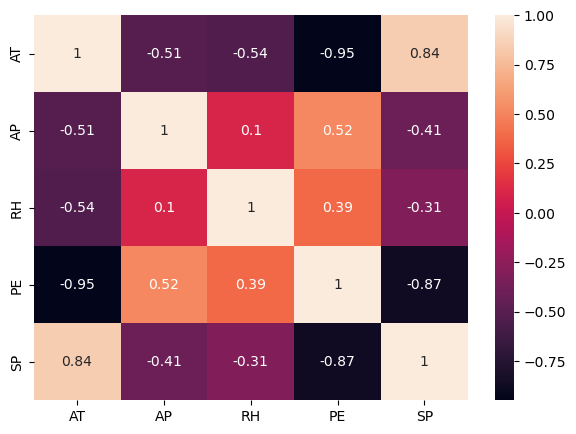

In [ ]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True);



: Correlation is measured on a scale of -1 to 1. -1 means complete negative correlation and 1 means complete positive correlation. 0 means no correlation at all.

1. Power has a strong negative correlation with 'Ambient Temperature' and 'Exhaust Vacuum' of the Plant. So, it seems that as Temperature or Vacuum increases the Power output of the Plant decreases.
2. Similarly, Power has a positive correlation with Pressure and Humidity. It seems that on increasing Humidity and Pressure, the Power output will increase.
3. Vacuum has a strong positive correlation with Temperature of the plant and also Humidity has a small positive correlation with Pressure.
4. All the other non Power linkages have a negative correlation.

- From the correlation matrix, we can see that AT and V have a strong negative correlation with the target variable (PE) as their correlation coefficients are -0.95 and -0.87 respectively. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.52 and 0.39.

#  Relationship between data using Seaborn Library

The linear relationships between AT and PE, V and PE, AP and PE, RH and PE are  worse

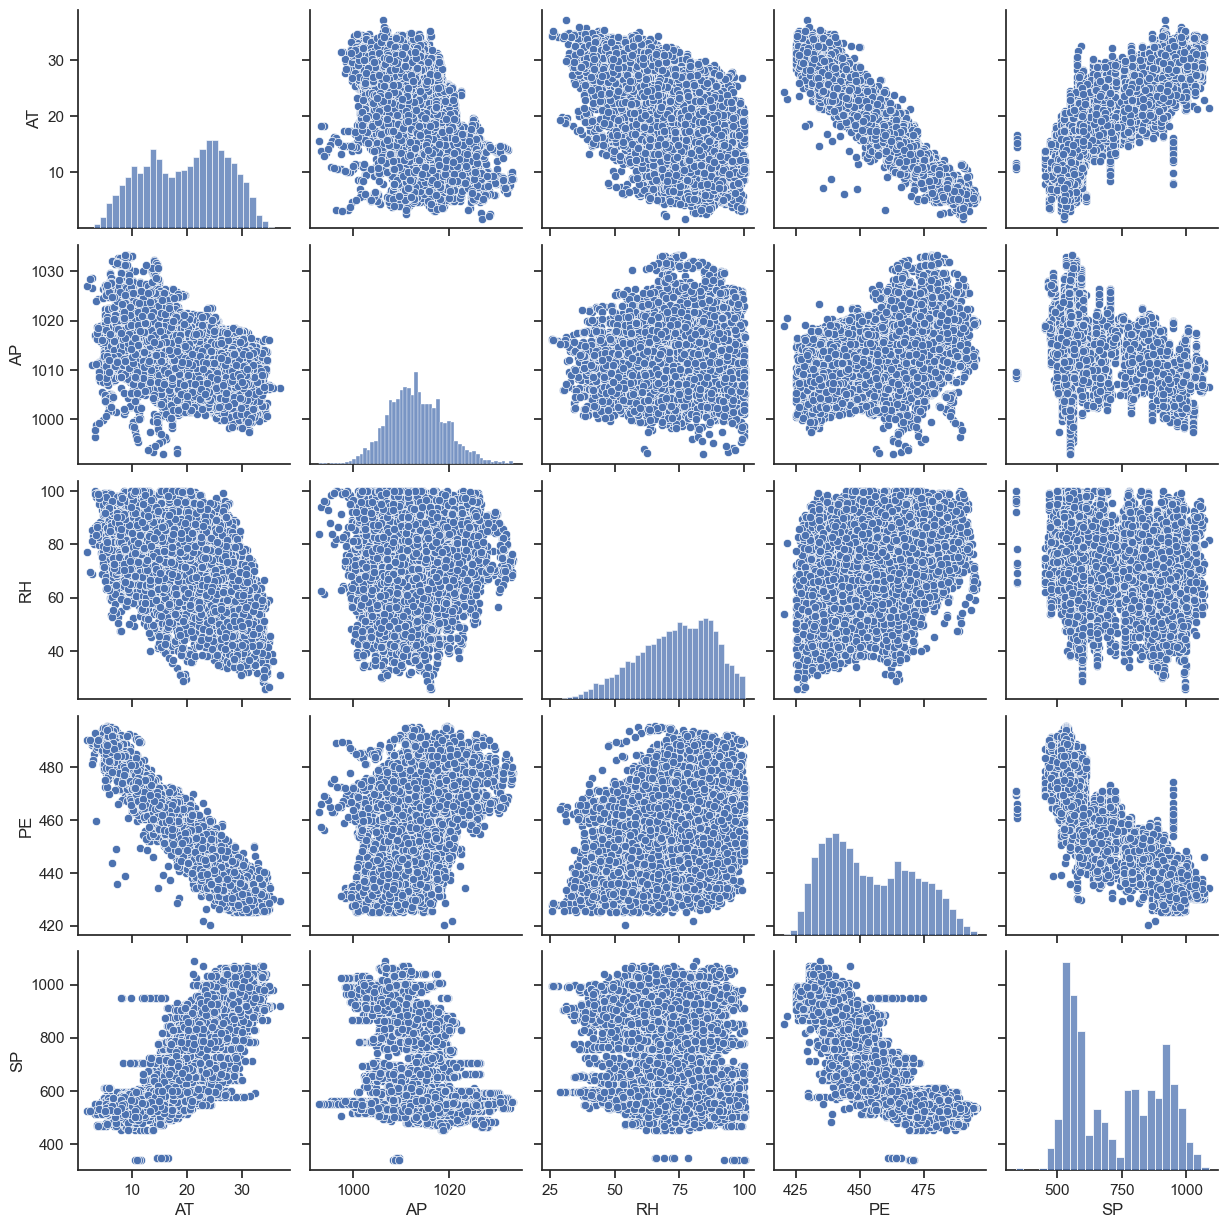

In [ ]:
sns.set(style='ticks')
sns.pairplot(df, diag_kind = 'hist');

1. Pressure follows almost a normal distribution.
2. Vacuum shows 3 peaks, so we will look and stress on clusters with 3,4 and 5 centroids.


Strong positive relation is observed in Temprature-Steam turbine pressure. Strong negative relation is observed in Steam turbine pressure-Output power and Temp-Output power

When visualized we can easily see that there is a distinctive pattern (negative correlation) seen on AT and V in relation to PE.

# Input Data Range

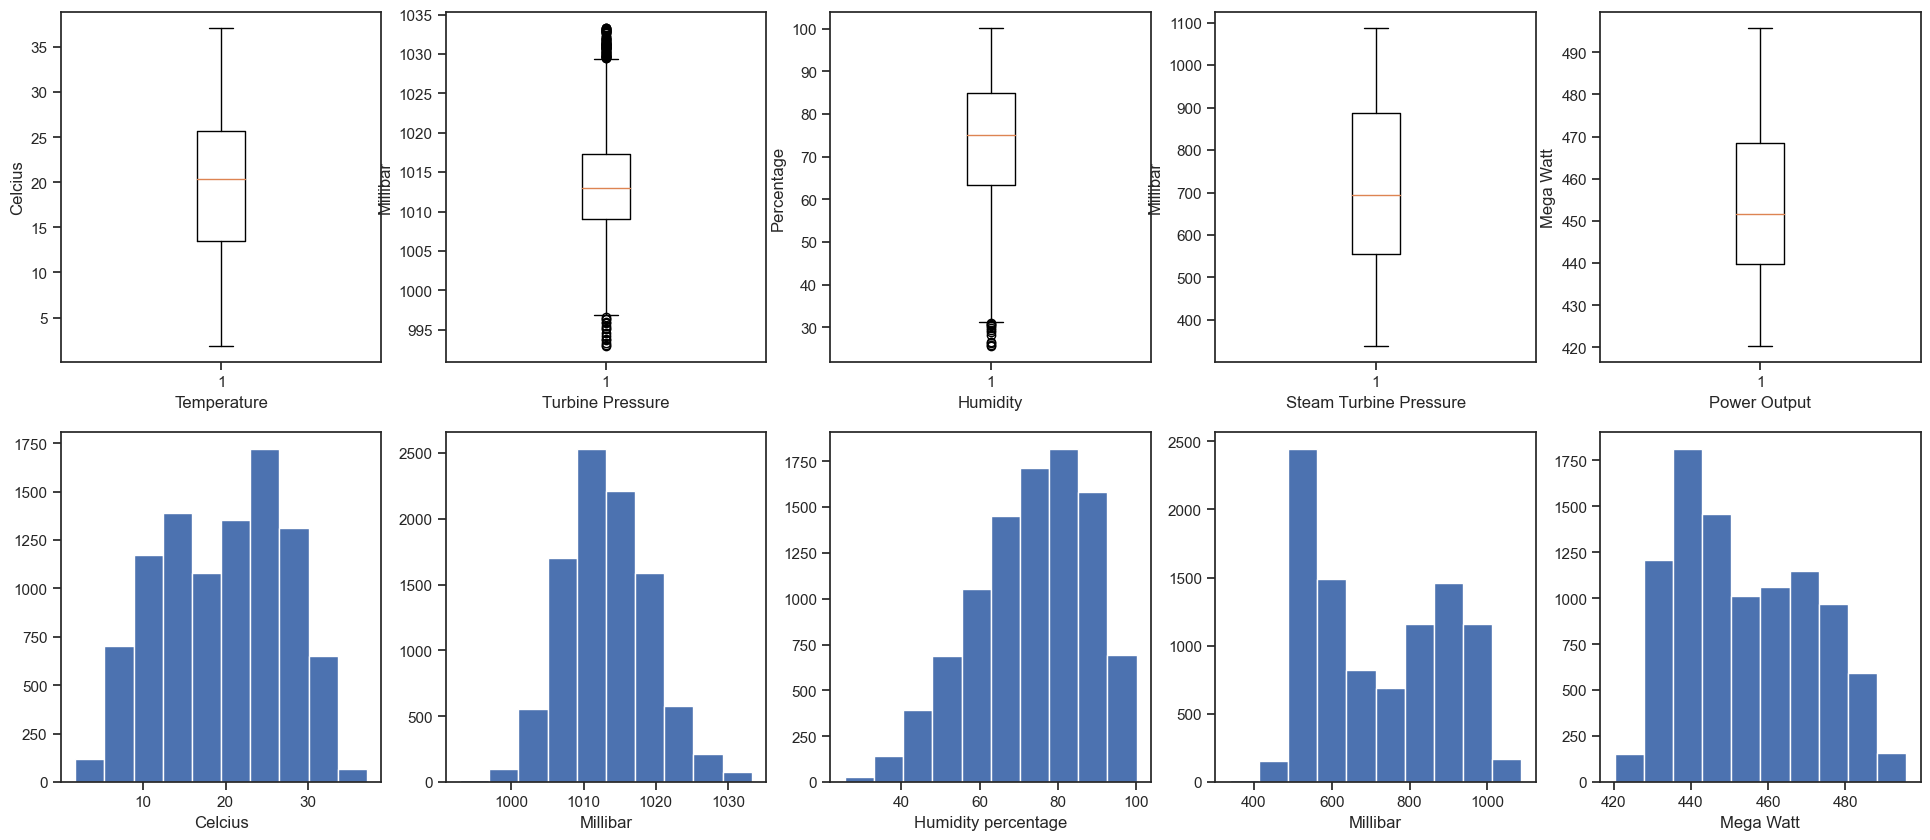

In [ ]:
fig, axes = plt. subplots (nrows=2, ncols=5, figsize=(24,10))
axes[0,0].boxplot(df.AT)
axes [0,0].set_xlabel( 'Temperature')
axes [0, 0] .set_ylabel( 'Celcius')
axes [0,1].boxplot (df.AP)
axes[0,1].set_xlabel ('Turbine Pressure')
axes [0,1].set_ylabel( 'Millibar')
axes [0,2] .boxplot(df.RH)
axes [0,2].set_xlabel( 'Humidity')
axes [0,2].set_ylabel( 'Percentage');
axes [0,3].boxplot(df.SP)
axes [0,3].set_xlabel( 'Steam Turbine Pressure')
axes [0,3].set_ylabel ('Millibar')
axes [0,4] .boxplot(df.PE)
axes [0,4].set_xlabel( 'Power Output')
axes [0,4].set_ylabel( 'Mega Watt')
axes [1,0].hist (df.AT)
axes[1,0].set_xlabel('Celcius')
axes [1,1].hist(df.AP)
axes [1,1].set_xlabel( 'Millibar')
axes [1,2].hist(df.RH)
axes [1,2].set_xlabel('Humidity percentage');
axes [1,3].hist(df.SP)
axes[1,3].set_xlabel ('Millibar')
axes [1,4].hist(df.PE)
axes [1,4].set_xlabel('Mega Watt')
plt.show()

The whiskers in boxplot represent 1.5 times interquartile range. One interesting thing to point out is that gas turbine pressure has smaller variation comparing to
 the other inputs. In gas turbine pressure plot , there are many outliers because most of data are concentrated on small interquartile range. Perhaps it is easier to
 control than other ones.


 # 2.  Feature Selection

Model : We select AT, V, AP, and RH as the predictors

In [ ]:
X= df.drop(['PE'],axis=1)

In [ ]:
X

,AT,AP,RH,SP
0,14.96,1024.07,73.17,556.6608
1,25.18,1020.04,59.08,839.2568
2,5.11,1012.16,92.14,525.2020
3,20.86,1010.24,76.64,764.0756
4,10.82,1009.23,96.62,499.8750
...,...,...,...,...
9563,16.65,1014.01,91.00,662.3677
9564,13.19,1023.67,66.78,522.2694
9565,31.32,1012.92,36.48,990.8189
9566,24.48,1013.86,62.39,925.7685


Our target variable (PE) is y

In [ ]:
y = df['PE']

# Training the model

The training set would be used to create the mathematical model of the relationship between the features and the target variable. The test set would be used to validate the model. To do this, we will use the sci-kit learn library and import the train_test_split module.

We will split the dataset into an 80% training set and a 20% test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression 

Linear Regression is a supervised machine learning method used to predict the unknown values with the known values from the dataset

y=mx+c

![image.png](attachment:image.png)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(X_test)
y_pred

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

# Decision Tree for Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_regressor.score(X_train, y_train)

1.0

In [ ]:
y_pred_dt = dt_regressor.predict(X_test)
y_pred_dt

array([431.28, 459.59, 460.06, ..., 471.46, 437.09, 462.55])

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf

array([433.5385, 457.9651, 463.6192, ..., 470.3358, 438.6733, 461.6743])

# Perfomance Evaluation

Root Mean Squared Error (RMSE): measures the average error performed by the model in predicting the outcome for an observation.

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4.442262858442491

The lower the RMSE score the better

R-Squared 
      Variation in the target that can be explained by set of features used in training the model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9325315554761302

The higher the R-squared score the better

Mean Absolute Error: measures how far predicted values are away from the actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

3.5665646552038224

The lower the MAE value the better

In [ ]:
import matplotlib.pyplot as plt


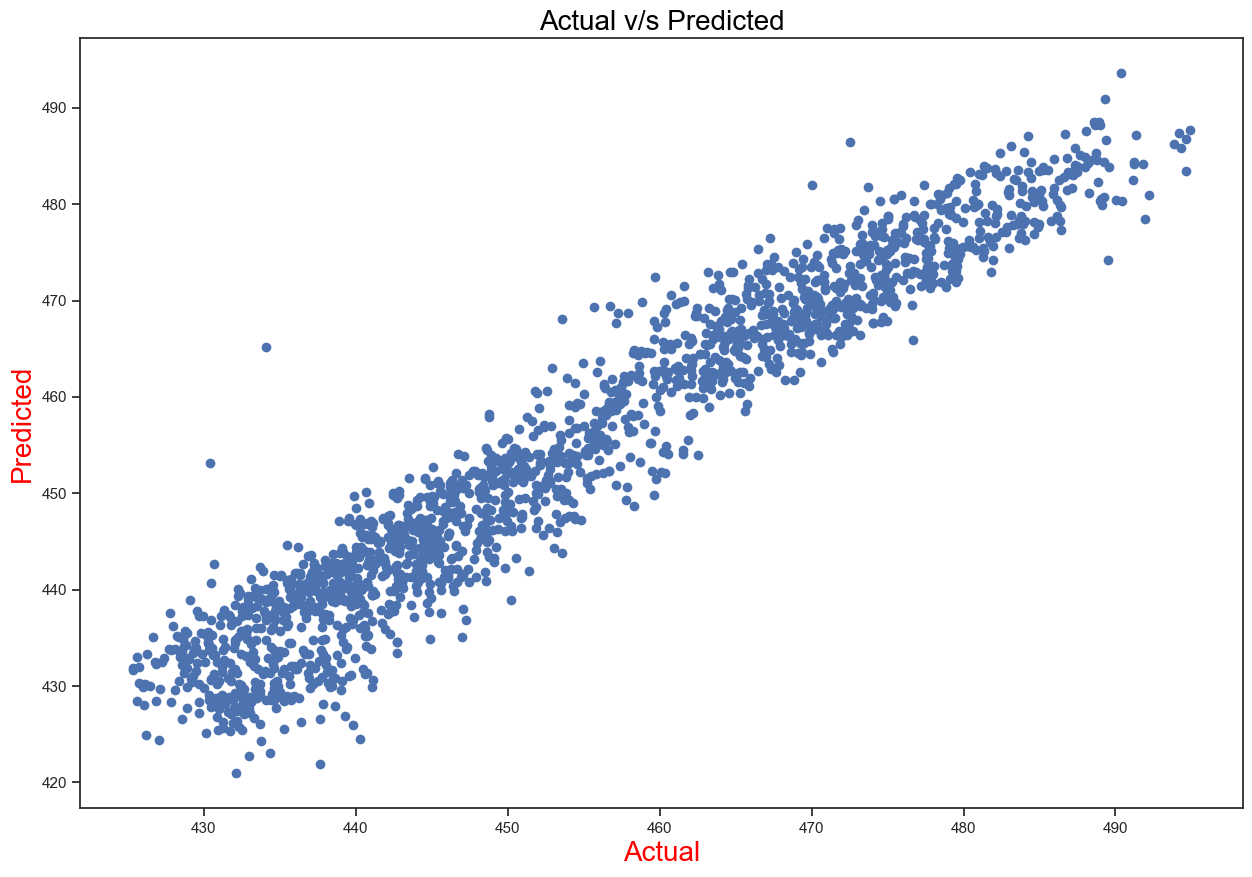

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual',color='red',size=20)
plt.ylabel('Predicted',color='red',size=20)
plt.title('Actual v/s Predicted',color='black',size=20)
plt.legend;

The above plot shows all the predicted and actual values in our plot We clearly observe that most of our data lie on our predicted path showing good accuracy thus to be a good fit line

The following DataFrame shows the actual value and Predicted Value and the difference between them, the overall difference is almost negligible with the actual values thus our model is well built

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted value,Difference
4834,431.23,431.427616,-0.197616
1768,460.01,458.561246,1.448754
2819,461.14,462.752647,-1.612647
7779,445.90,448.595962,-2.695962
7065,451.29,457.870777,-6.580777
...,...,...,...
6452,460.29,463.634916,-3.344916
794,452.42,457.035484,-4.615484
627,473.26,469.518359,3.741641
3515,438.00,442.417595,-4.417595


In [ ]:
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
4834,431.23,431.427616,-0.197616
1768,460.01,458.561246,1.448754
2819,461.14,462.752647,-1.612647
7779,445.90,448.595962,-2.695962
7065,451.29,457.870777,-6.580777
9482,432.68,429.693839,2.986161
9,477.50,473.041853,4.458147
4986,459.68,456.508363,3.171637
6168,477.50,474.340491,3.159509
3664,444.99,446.343029,-1.353029


# Summary 




We have now built a robust model which can predict our requirements for the following dataset predicting output power in a power plant is one of the most crucial tasks. So it has to be done carefully we use Supervised learning from ML.
 this is because we have cummulative data of over 6 years which provide us with a fair bit of knowledge and leverage to predict the future output for the given inputs.

# Reference

# https://archive.ics.uci.edu/ml/datasets/combined%20cycle%20power%20plant


https://www.researchgate.net/publication/357409478_Prediction_of_combined_cycle_power_plant_electrical_output_power_using_machine_learning_regression_algorithms

# Citation Request:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link].
([Web Link])

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)